# NUMERICAL ANALYSIS

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

In [42]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## UNIVARIATE ANALYSIS
### ONE VARIABLE 

In [101]:
# categorical variable 
df_category = df[['Geography','Gender','Exited']]
df_category

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0
...,...,...,...
9995,France,Male,0
9996,France,Male,0
9997,France,Female,1
9998,Germany,Male,1


### getting ratio of exited feature#

In [104]:
df_category.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [106]:
df_category.Exited.value_counts()/len(df_category)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

### COUNTPLOT

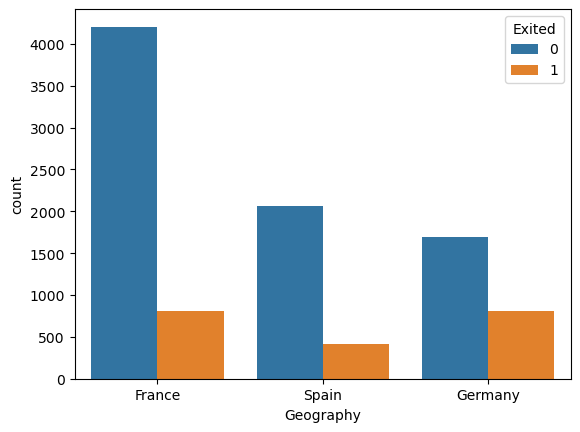

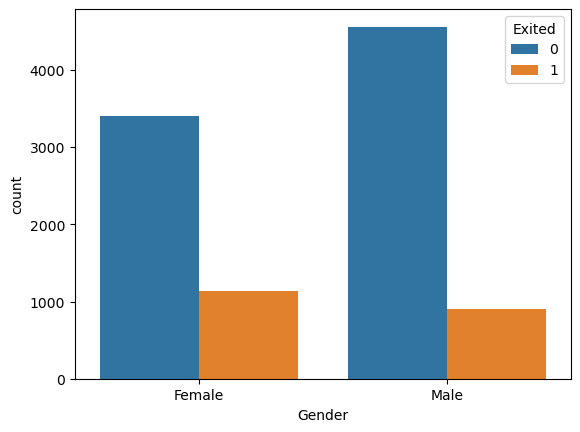

In [109]:
for i , predictor in enumerate(df_category.drop(columns = ['Exited'])):
    plt.figure()
    sns.countplot( x = predictor , data = df_category, hue= 'Exited' )

In [188]:
df_g  =df_category.groupby('Geography')['Exited'].sum()
df_calculate = pd.DataFrame(df_g)
df_calculate

,Exited
Geography,
France,810
Germany,814
Spain,413


In [190]:
df_c = df_category.groupby('Geography')['Exited'].count()
df_calculate['total count'] = df_c

df_calculate['%%'] =  df_calculate['Exited'] / df_calculate['total count'] * 100


In [192]:
df_calculate

,Exited,total count,%%
Geography,,,
France,810,5014,16.154767
Germany,814,2509,32.443204
Spain,413,2477,16.673395


## BIVARIATE ANALYSIS 
### TWO VARIABLE 

### HISTPLOT

<Axes: xlabel='Gender', ylabel='Count'>

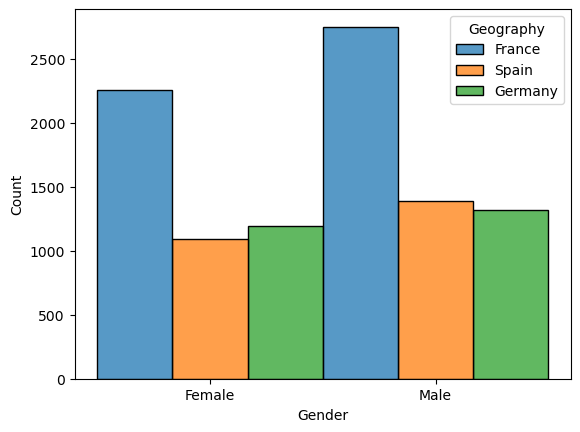

In [178]:
sns.histplot( x= 'Gender', hue = 'Geography', data = df , stat = 'count' , multiple = 'dodge' )

In [182]:
# for churn customer  

exited_p = df_category.loc[df_category['Exited']==1]
exited_p

,Geography,Gender,Exited
0,France,Female,1
2,France,Female,1
5,Spain,Male,1
7,Germany,Female,1
16,Germany,Male,1
...,...,...,...
9981,Germany,Male,1
9982,Germany,Female,1
9991,France,Female,1
9997,France,Female,1


<Axes: xlabel='Gender', ylabel='Count'>

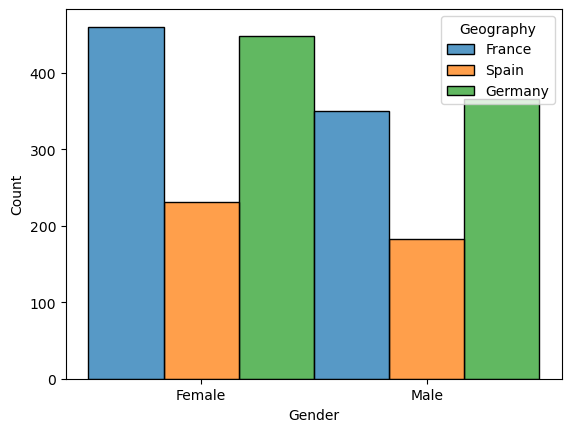

In [184]:
sns.histplot( x= 'Gender', hue = 'Geography', data = exited_p  , stat = 'count' , multiple = 'dodge' )

# NUMERICAL ANALYSIS

#### CORRELATION 
    RANGE FROM -1 TO 1 
    +1 ----> POSITIVE CORRELATION
    -1 ----> NEGATIVE CORRELATION
    0  ----> NO CORRELATION 

In [226]:
for_heat = df.drop(columns = ['Geography','Gender','Surname'])
df_heat = pd.DataFrame(for_heat)
df_heat
df_heat.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

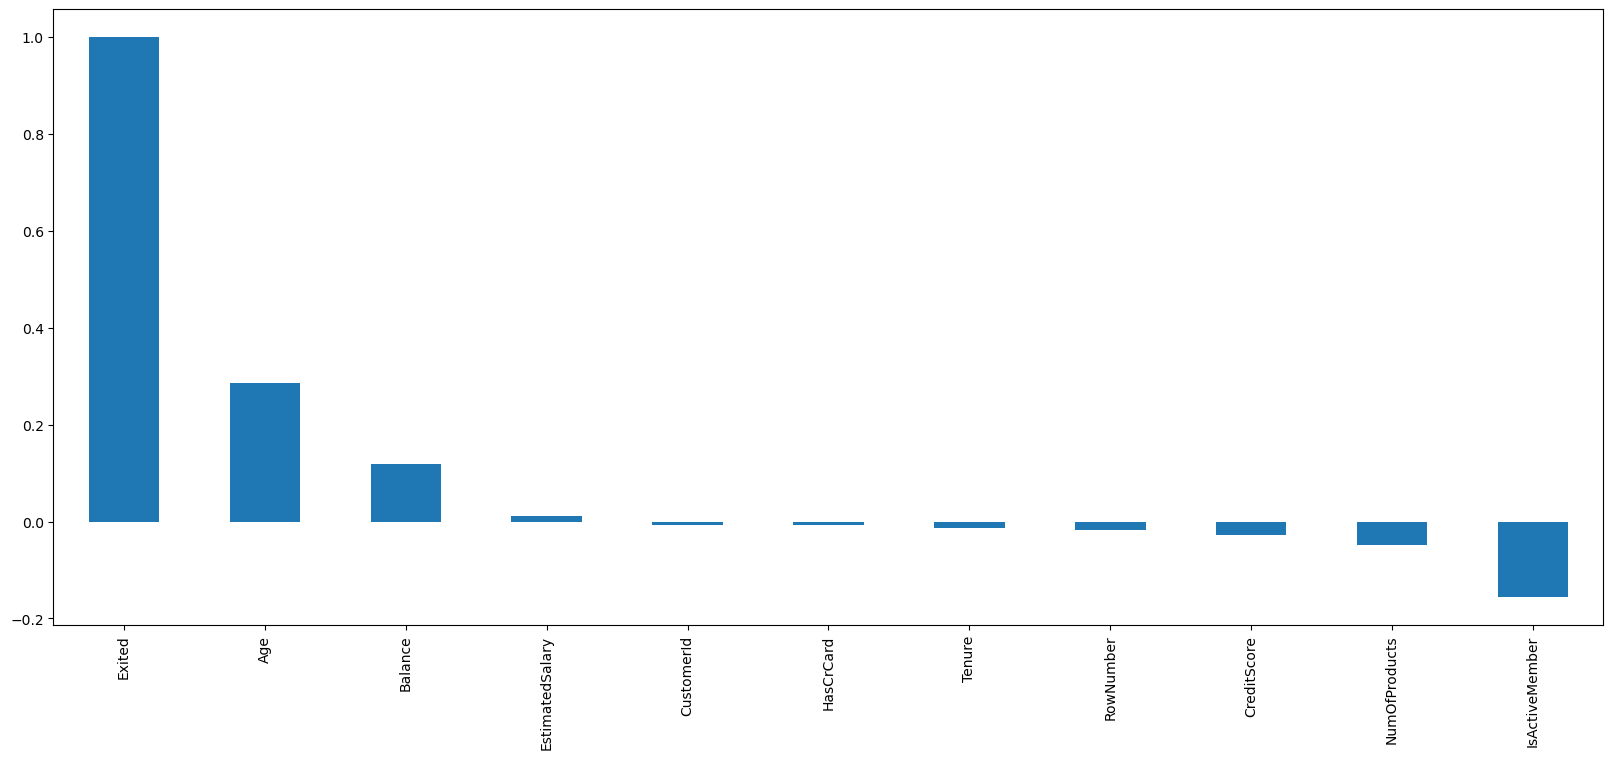

In [232]:
### HEATMAP ABOUT CORRELATION
plt.figure(figsize = (20,8))
df_heat.corr()['Exited'].sort_values(ascending = False).plot(kind = 'bar') # corelation of multiple variable with one [exited] variable 

In [234]:
df_heat.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

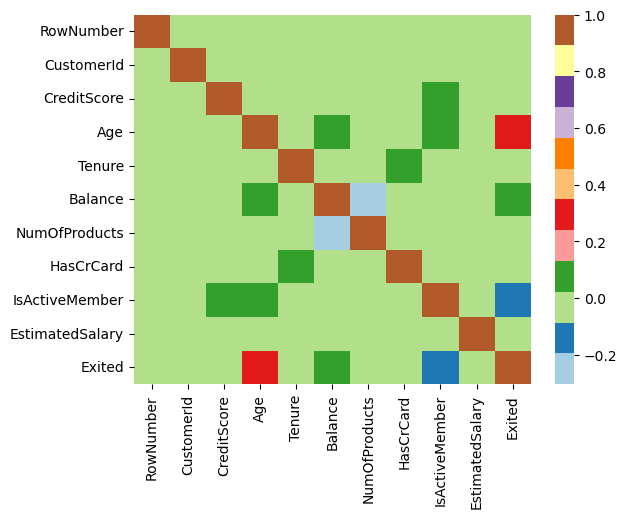

In [236]:
sns.heatmap(df_heat.corr(), cmap = 'Paired')

### ANOTHER plot

<Axes: xlabel='Age'>

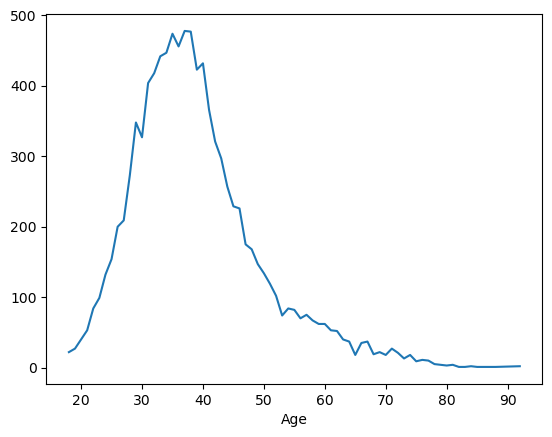

In [248]:
df_heat['Age'].value_counts().sort_index(ascending = True ).plot() 

MOST OF THE PEOPLLE ARE AROUND AT 30 TO 45 AGE 

<Axes: xlabel='Age'>

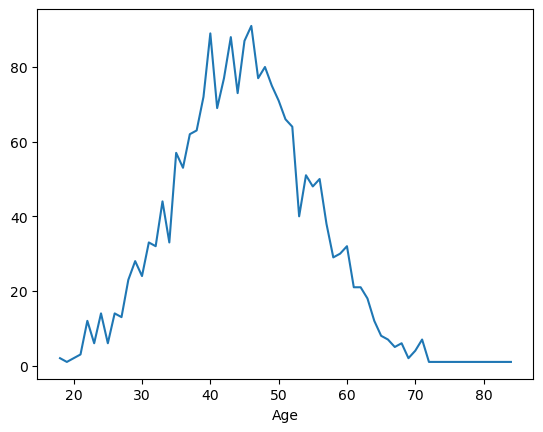

In [253]:
#IN CHURN 
churn_p = df_heat.loc[df_heat['Exited']==1]
churn_p['Age'].value_counts().sort_index(ascending = True ).plot() 

AROUND 30 TO 50 AGED PEOPLE WHERE EXIT THE COMPANY

### KDE PLOT

/tmp/ipykernel_104039/980309501.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(df_heat.Age[(df_heat['Exited'] == 0)],color = 'Red',shade = True)
/tmp/ipykernel_104039/980309501.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(df_heat.Age[(df_heat['Exited'] == 1)],color = 'Blue',shade = True)


Text(0.5, 1.0, 'age by churn')

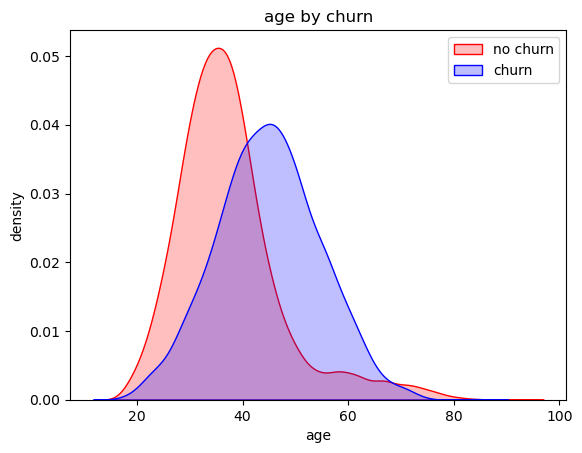

In [257]:
tot = sns.kdeplot(df_heat.Age[(df_heat['Exited'] == 0)],color = 'Red',shade = True)

tot = sns.kdeplot(df_heat.Age[(df_heat['Exited'] == 1)],color = 'Blue',shade = True)
tot.legend(["no churn","churn"], loc = 'upper right')
tot.set_ylabel('density')
tot.set_xlabel('age')
tot.set_title('age by churn')

/tmp/ipykernel_104039/3079450587.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(df_heat.Tenure[(df_heat['Exited'] == 0)],color = 'Red',shade = True)
/tmp/ipykernel_104039/3079450587.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(df_heat.Tenure[(df_heat['Exited'] == 1)],color = 'Blue',shade = True)


Text(0.5, 1.0, 'tenure by churn')

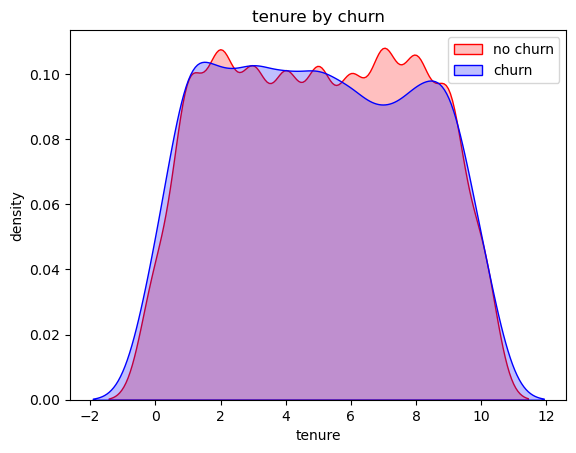

In [263]:
tot = sns.kdeplot(df_heat.Tenure[(df_heat['Exited'] == 0)],color = 'Red',shade = True)

tot = sns.kdeplot(df_heat.Tenure[(df_heat['Exited'] == 1)],color = 'Blue',shade = True)
tot.legend(["no churn","churn"], loc = 'upper right')
tot.set_ylabel('density')
tot.set_xlabel('tenure')
tot.set_title('tenure by churn')

/tmp/ipykernel_104039/1700515345.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(df_heat.Balance[(df_heat['Exited'] == 0)],color = 'Red',shade = True)
/tmp/ipykernel_104039/1700515345.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(df_heat.Balance[(df_heat['Exited'] == 1)],color = 'Blue',shade = True)


Text(0.5, 1.0, 'age by churn')

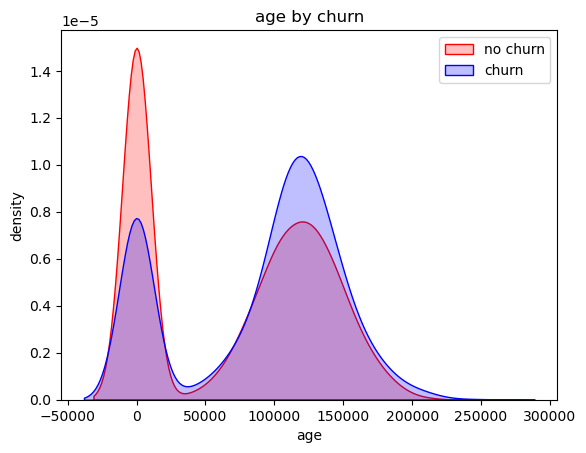

In [265]:
tot = sns.kdeplot(df_heat.Balance[(df_heat['Exited'] == 0)],color = 'Red',shade = True)

tot = sns.kdeplot(df_heat.Balance[(df_heat['Exited'] == 1)],color = 'Blue',shade = True)
tot.legend(["no churn","churn"], loc = 'upper right')
tot.set_ylabel('density')
tot.set_xlabel('age')
tot.set_title('age by churn')